Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [20]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset
sales_data = pd.read_csv("sales_data_with_discounts.csv")

In [3]:
sales_data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [5]:
sales_data.describe(include='all')

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450,450,450,450,450.000000,450,450,450,450.000000,450.000000,450.000000,450.000000,450.000000
unique,15,7,30,1,NaN,3,9,30,NaN,NaN,NaN,NaN,NaN
top,01-04-2021,Thursday,M01,C,NaN,Mobiles,Jeera,RU-10,NaN,NaN,NaN,NaN,NaN
freq,30,90,15,450,NaN,150,90,15,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.066667,NaN,NaN,NaN,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,NaN,NaN,NaN,NaN,4.231602,NaN,NaN,NaN,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,290.000000,400.000000,5.007822,69.177942,326.974801
25%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,10100.000000,53200.000000,18.114718,5316.495427,47847.912852


In [6]:
sales_data.isna().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [14]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'],errors='coerce')

In [16]:
#Identify numerical columns in the dataset
numerical_col = sales_data.select_dtypes(np.number)

In [17]:
numerical_col.columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [18]:
# Identify categorical columns
sales_data.select_dtypes(object)

,Day,SKU,City,BU,Brand,Model
0,Thursday,M01,C,Mobiles,RealU,RU-10
1,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,Thursday,M03,C,Mobiles,YouM,YM-99
3,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...
445,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,Thursday,L07,C,Lifestyle,Viva,W-Western
447,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [9]:
numerical_col.describe(include='all')

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


#### Data Visualization

●	Histograms:

	Plot histograms for each numerical column.
	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences


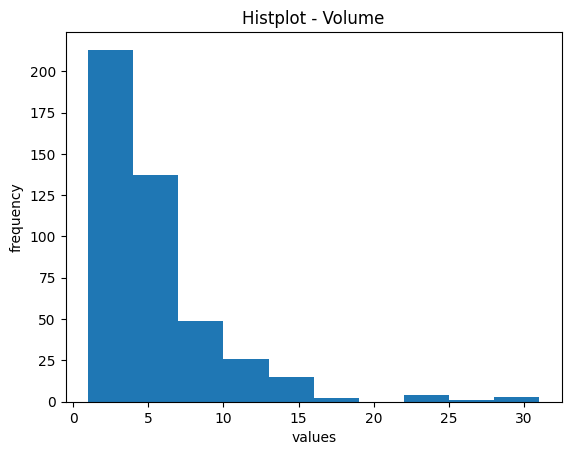

In [25]:
plt.hist(sales_data['Volume'])
plt.xlabel('values')
plt.ylabel('frequency')
plt.title('Histplot - Volume')
plt.show()